# CV19SIM: EPIcSuite simulator interface
Work in progress

In [2]:
import numpy as np
import pandas as pd
import toml
import time
import matplotlib.pyplot as plt
from cv19gm.cv19sim import CV19SIM
from cv19gm.models.seir_meta import SEIRMETA

## Lectura archivo de configuración

In [2]:
cfg = '/home/samuel/cv19gm-research/cfg/SIR2.toml'

### Creación objeto de multisimulación

In [3]:
sims = CV19SIM(cfg)

In [4]:
# Resolver EDOS
sims.solve()

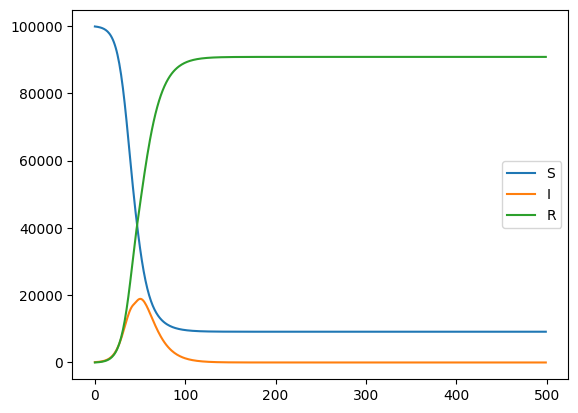

In [8]:
plt.plot(sims.t,sims.S, label='S')
plt.plot(sims.t,sims.I, label='I')
plt.plot(sims.t,sims.R, label='R')

plt.legend(loc=0)
plt.show()


## Metapopulation

In [23]:
cfgfile = '/home/samuel/cv19gm-research/cfg/SEIR_Metapopulation2.toml'
cfg = toml.load(cfgfile) # no es necesario, pero es util para ver el archivo de configuracion

In [24]:
sims = SEIRMETA(cfg)

In [25]:
sims.alpha(30)

array([1. , 1. , 0.6])

In [26]:
# Resolver EDOS
sims.solve()

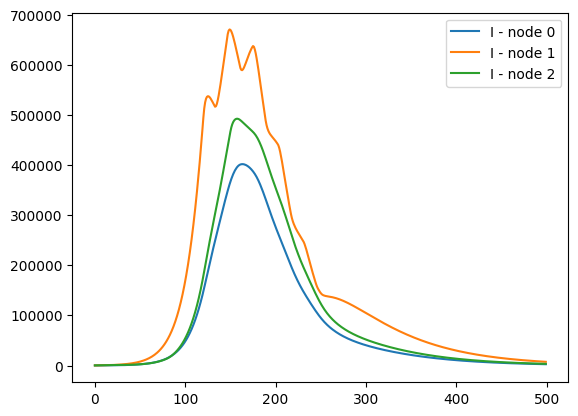

In [27]:
for i in range(sims.nodes):
    plt.plot(sims.t,sims.I[i], label='I - node '+str(i))

plt.legend(loc=0)
plt.show()


# kwargs

In [ ]:
sims2 = CV19SIM(cfg,I_det=[5000,8000,10000],population=[100000,500000,1000000])

In [ ]:
start = time.time()
sims2.solve()
stop = time.time()
print('Elapsed time = '+str(stop-start)+' seconds')

In [ ]:
sims2.sims[0,1,1,1].results

# Single simulation

In [ ]:
cfgfile = '../config_files/SEIR.toml'
cfg = toml.load(cfgfile)

In [ ]:
sims3 = CV19SIM(cfg)

In [ ]:
sims3.solve()

In [ ]:
sim = sims3.sims[0]

In [ ]:
plt.plot(sim.t,sim.S,label='S')
plt.plot(sim.t,sim.E,label='E')
plt.plot(sim.t,sim.I,label='I')
plt.plot(sim.t,sim.R,label='R')
plt.legend(loc=0)
plt.show()

In [ ]:
def seno(t):
    return 0.1*np.sin(t) + 0.1

In [ ]:
sims3 = CV19SIM(cfg,beta=seno)

In [ ]:
sims3.solve()

In [ ]:
sims3.sims[0].results

In [ ]:
for i in sims3.sims:
    plt.plot(i.t,i.I)


In [ ]:
plt.plot(sim.t,sim.S,label='S')
plt.plot(sim.t,sim.E,label='E')
plt.plot(sim.t,sim.I,label='I')
plt.plot(sim.t,sim.R,label='R')
plt.legend(loc=0)
plt.show()

# Value copies
When we want to run arrays of values using the same value for 2 different parameters.

In [ ]:
cfgfile = '../config_files/SEIR.toml'
cfg = toml.load(cfgfile)

In [ ]:
sims6 = CV19SIM(cfg,tE_I=[1,2,3],tI_R='tE_I')

In [ ]:
sims6.solve()

# SEIRHVD

In [ ]:
cfgfile = 'cfg/SEIRHVD.toml'
cfg = toml.load(cfgfile)
sims4 = CV19SIM(cfg,model='SEIRHVD')

In [ ]:
sims4.solve()

In [ ]:
plt.plot(sims4.sims[0].t,sims4.sims[0].S,label='S')
plt.plot(sims4.sims[0].t,sims4.sims[0].E,label='E')
plt.plot(sims4.sims[0].t,sims4.sims[0].I,label='I')
plt.plot(sims4.sims[0].t,sims4.sims[0].R,label='R')
plt.xlim(0,150)
plt.legend(loc=0)

In [ ]:
plt.plot(sims4.sims[0].t,sims4.sims[0].H,label='H')
plt.plot(sims4.sims[0].t,sims4.sims[0].D,label='D')
plt.xlim(0,150)
plt.legend(loc=0)

## Multiple simulations with array of parameters

In [ ]:
cfgfile = 'cfg/SEIRHVD.toml'
cfg = toml.load(cfgfile)
sims5 = CV19SIM(cfg,model='SEIRHVD',pH_D = list(np.linspace(0, 0.5, 10)),H_cap = 10000)

In [ ]:
sims5.solve()

In [ ]:
for sim in sims5.sims:
    plt.plot(sim.t,sim.D,label='pH_D='+str(np.around(sim.pH_D(0),1)))
plt.legend(loc=0)
plt.show()

Nota: Este ejemplo hace que se acumule más gente en el hospital cuando baja la tasa de mortalidad, eso se podrá corregir con el nuevo parámetro CFR (not ready). 

In [ ]:
cfgfile = '../config_files/SEIR.toml'

In [ ]:
sims = CV19SIM(cfgfile,beta=[0.18,0.2,0.22])

In [ ]:
sims.solve()

In [ ]:
for i in sims.sims:
    plt.plot(i.t,i.I,label='Beta='+str(i.beta(0)))
    
plt.legend(loc=0)